# Distribution of characters of the whole Avatar Series based on their nation using Selenium

## Imports

In [2]:
import pandas as pd
import time
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
import matplotlib.pyplot as plt
import os
import logging
import warnings

## Web Scraping the Characters of the Water Tribe

In [3]:
# Setup chrome options
chrome_options = Options()
chrome_options.add_argument("--headless") # Ensure GUI is off
chrome_options.add_argument("--no-sandbox")

# Download drivers
logging.getLogger('WDM').setLevel(logging.NOTSET)
os.environ['WDM_LOG'] = 'False'

# Create service
webdriver_service = Service(ChromeDriverManager().install())

# Create driver
driver = webdriver.Chrome(service = webdriver_service, options = chrome_options)

# Go to the characters in Water Tribe page
water_tribe_url = "https://avatar.fandom.com/wiki/Category:Water_Tribe_characters"
driver.get(water_tribe_url)

# Find characters
water_tribe_char = driver.find_elements(by=By.CLASS_NAME, value='category-page__member-link')

# Collect characters
water_tribe_characters = []
for character in water_tribe_char :
    character_name = character.text
    water_tribe_characters.append({'nation': 'water_tribe', 'characters_name': character_name})
    
water_tribe_characters 

[{'nation': 'water_tribe', 'characters_name': 'Amak'},
 {'nation': 'water_tribe', 'characters_name': 'Amon'},
 {'nation': 'water_tribe', 'characters_name': 'Aniki'},
 {'nation': 'water_tribe', 'characters_name': 'Arnook'},
 {'nation': 'water_tribe', 'characters_name': 'Ashuna'},
 {'nation': 'water_tribe', 'characters_name': 'Atuat'},
 {'nation': 'water_tribe', 'characters_name': 'Aupilaarjuk'},
 {'nation': 'water_tribe', 'characters_name': 'Bato'},
 {'nation': 'water_tribe', 'characters_name': 'Changunak'},
 {'nation': 'water_tribe', 'characters_name': 'Chukagnak'},
 {'nation': 'water_tribe', 'characters_name': 'Desna and Eska'},
 {'nation': 'water_tribe', 'characters_name': 'Due'},
 {'nation': 'water_tribe', 'characters_name': 'Enuk'},
 {'nation': 'water_tribe',
  'characters_name': 'Category:Foggy Swamp Tribe characters'},
 {'nation': 'water_tribe', 'characters_name': 'Gilak'},
 {'nation': 'water_tribe', 'characters_name': 'Hahn'},
 {'nation': 'water_tribe', 'characters_name': 'Hakod

## Convert the list to DataFrame

In [4]:
water_tribe_characters_df = pd.DataFrame(water_tribe_characters)
water_tribe_characters_df

,nation,characters_name
0,water_tribe,Amak
1,water_tribe,Amon
2,water_tribe,Aniki
3,water_tribe,Arnook
4,water_tribe,Ashuna
...,...,...
82,water_tribe,White Lotus leader
83,water_tribe,Yagoda
84,water_tribe,Yakone
85,water_tribe,Yakone's wife


## Clearning the data

In [5]:
# Discard the category data and duplicate data
warnings.filterwarnings("ignore", 'This pattern has match groups')
discard = ['Category', '(games)', '(pilot)']
water_tribe_characters_df = water_tribe_characters_df[~water_tribe_characters_df['characters_name'].str.contains('|'.join(discard))]
water_tribe_characters_df

,nation,characters_name
0,water_tribe,Amak
1,water_tribe,Amon
2,water_tribe,Aniki
3,water_tribe,Arnook
4,water_tribe,Ashuna
...,...,...
82,water_tribe,White Lotus leader
83,water_tribe,Yagoda
84,water_tribe,Yakone
85,water_tribe,Yakone's wife


## Web Scraping the Characters of the Earth Kingdom

In [6]:
# Go to the characters in Earth Kingdom page
earth_kingdom_url = "https://avatar.fandom.com/wiki/Category:Earth_Kingdom_characters"
driver.get(earth_kingdom_url)

# Find characters
earth_kingdom_char = driver.find_elements(by=By.CLASS_NAME, value='category-page__member-link')

# Collect characters
earth_kingdom_characters = []
for character in earth_kingdom_char :
    character_name = character.text
    earth_kingdom_characters.append({'nation': 'earth_kingdom', 'characters_name': character_name})
    
# Convert the list to DataFrame 
earth_kingdom_characters_df = pd.DataFrame(earth_kingdom_characters)

# Discard the category data and duplicate data
warnings.filterwarnings("ignore", 'This pattern has match groups')
discard = ['Category', '(games)', '(pilot)']
earth_kingdom_characters_df = earth_kingdom_characters_df[~earth_kingdom_characters_df['characters_name'].str.contains('|'.join(discard))]
earth_kingdom_characters_df

,nation,characters_name
0,earth_kingdom,46th Earth King
1,earth_kingdom,Aiwei
2,earth_kingdom,Animal control officer
3,earth_kingdom,Anri
4,earth_kingdom,Aoma
...,...,...
195,earth_kingdom,Sarnai
196,earth_kingdom,Scary prisoner
197,earth_kingdom,Sela
198,earth_kingdom,Senlin Village leader


## Web Scraping the Characters of the Fire Nation

In [7]:
# Go to the characters in Fire Nation page
fire_nation_url = "https://avatar.fandom.com/wiki/Category:Fire_Nation_characters"
driver.get(fire_nation_url)

# Find characters
fire_nation_char = driver.find_elements(by=By.CLASS_NAME, value='category-page__member-link')

# Collect characters
fire_nation_characters = []
for character in fire_nation_char :
    character_name = character.text
    fire_nation_characters.append({'nation': 'fire_nation', 'characters_name': character_name})

# Convert the list to DataFrame 
fire_nation_characters_df = pd.DataFrame(fire_nation_characters)

# Discard the category data and duplicate data
warnings.filterwarnings("ignore", 'This pattern has match groups')
discard = ['Category', '(games)', '(pilot)']
fire_nation_characters_df = fire_nation_characters_df[~fire_nation_characters_df['characters_name'].str.contains('|'.join(discard))]
fire_nation_characters_df

,nation,characters_name
0,fire_nation,Anada
1,fire_nation,Azula
3,fire_nation,Azula's ship captain
4,fire_nation,Azulon
5,fire_nation,Bai
...,...,...
172,fire_nation,Zhao
173,fire_nation,Zimo
174,fire_nation,Zirin
175,fire_nation,Zoryu


## Web Scraping the Characters of the Air Nomad

In [8]:
# Go to the characters in Air Nomad page
air_nomad_url = "https://avatar.fandom.com/wiki/Category:Air_Nomad_characters"
driver.get(air_nomad_url)

# Find characters
air_nomad_char = driver.find_elements(by=By.CLASS_NAME, value='category-page__member-link')

# Collect characters
air_nomad_characters = []
for character in air_nomad_char :
    character_name = character.text
    air_nomad_characters.append({'nation': 'air_nomad', 'characters_name': character_name})
    
# Convert the list to DataFrame 
air_nomad_characters_df = pd.DataFrame(air_nomad_characters)

# Discard the category data and duplicate data
warnings.filterwarnings("ignore", 'This pattern has match groups')
discard = ['Category', '(games)', '(pilot)']
air_nomad_characters_df = air_nomad_characters_df[~air_nomad_characters_df['characters_name'].str.contains('|'.join(discard))]
air_nomad_characters_df

,nation,characters_name
0,air_nomad,Aang
3,air_nomad,Afiko
4,air_nomad,Air Nomad boy
5,air_nomad,Anada
6,air_nomad,Appa
7,air_nomad,Appa's mother
8,air_nomad,Bo
9,air_nomad,Chegu
10,air_nomad,Dagmola
12,air_nomad,Ema


## Concatenate all the DataFrames

In [9]:
dataframes = [water_tribe_characters_df, earth_kingdom_characters_df, fire_nation_characters_df, air_nomad_characters_df]
avatar_df = pd.concat(dataframes)
avatar_df

,nation,characters_name
0,water_tribe,Amak
1,water_tribe,Amon
2,water_tribe,Aniki
3,water_tribe,Arnook
4,water_tribe,Ashuna
...,...,...
38,air_nomad,Tsering
39,air_nomad,Ugyen
40,air_nomad,Yangchen
41,air_nomad,Yingyong


## Distribution of characters for every nation in Avatar series

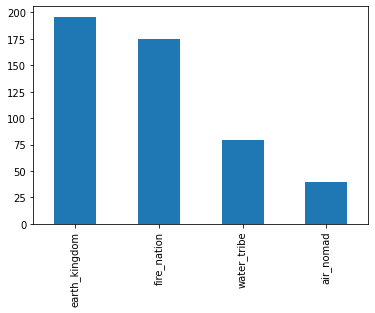

In [10]:
avatar_df['nation'].value_counts().plot(kind="bar")
plt.show()

## Save the DataFrame to .csv file

In [11]:
avatar_df.to_csv('avatar_df.csv', index=False)